In [1]:
%pylab inline
import scipy.io.netcdf
import glob
import xmitgcm
import xarray

import subprocess as sub

Populating the interactive namespace from numpy and matplotlib


/data/mathlib/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/data/mathlib/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [262]:
ds001 = xmitgcm.open_mdsdataset('./BACKUP_t002_unique_obcU_BIHARM/',prefix = ['S', 'Eta', 'U', 'T', 'V', 'W'])
ds002 = xmitgcm.open_mdsdataset('./BACKUP_t001_unique_obcU/',prefix = ['S', 'Eta', 'U', 'T', 'V', 'W'],iters=arange(0,933120,2592))

print(ds001)

/data/mathlib/anaconda3/lib/python3.7/site-packages/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in ./BACKUP_t002_unique_obcU_BIHARM/ or ./BACKUP_t002_unique_obcU_BIHARM/. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))
/data/mathlib/anaconda3/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/data/mathlib/anaconda3/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (o

<xarray.Dataset>
Dimensions:  (XC: 100, XG: 100, YC: 75, YG: 75, Z: 18, Zl: 18, Zp1: 19, Zu: 18, time: 361)
Coordinates:
  * XC       (XC) >f4 0.02 0.06 0.1 0.14 0.18 0.22 ... 3.82 3.86 3.9 3.94 3.98
  * YC       (YC) >f4 16.02 16.06 16.1 16.14 16.18 ... 18.86 18.9 18.94 18.98
  * XG       (XG) >f4 1.3877788e-17 0.04 0.08 0.12 0.16 ... 3.84 3.88 3.92 3.96
  * YG       (YG) >f4 16.0 16.04 16.08 16.12 16.16 ... 18.84 18.88 18.92 18.96
  * Z        (Z) >f4 -25.0 -75.0 -125.0 -175.0 ... -3250.0 -3750.0 -4250.0
  * Zp1      (Zp1) >f4 0.0 -50.0 -100.0 -150.0 ... -3500.0 -4000.0 -4500.0
  * Zu       (Zu) >f4 -50.0 -100.0 -150.0 -200.0 ... -3500.0 -4000.0 -4500.0
  * Zl       (Zl) >f4 0.0 -50.0 -100.0 -150.0 ... -3000.0 -3500.0 -4000.0
    rA       (YC, XC) >f4 dask.array<chunksize=(75, 100), meta=np.ndarray>
    dxG      (YG, XC) >f4 dask.array<chunksize=(75, 100), meta=np.ndarray>
    dyG      (YC, XG) >f4 dask.array<chunksize=(75, 100), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<

In [260]:
ds001.XC.data

array([0.02, 0.06, 0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42,
       0.46, 0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86,
       0.9 , 0.94, 0.98, 1.02, 1.06, 1.1 , 1.14, 1.18, 1.22, 1.26, 1.3 ,
       1.34, 1.38, 1.42, 1.46, 1.5 , 1.54, 1.58, 1.62, 1.66, 1.7 , 1.74,
       1.78, 1.82, 1.86, 1.9 , 1.94, 1.98, 2.02, 2.06, 2.1 , 2.14, 2.18,
       2.22, 2.26, 2.3 , 2.34, 2.38, 2.42, 2.46, 2.5 , 2.54, 2.58, 2.62,
       2.66, 2.7 , 2.74, 2.78, 2.82, 2.86, 2.9 , 2.94, 2.98, 3.02, 3.06,
       3.1 , 3.14, 3.18, 3.22, 3.26, 3.3 , 3.34, 3.38, 3.42, 3.46, 3.5 ,
       3.54, 3.58, 3.62, 3.66, 3.7 , 3.74, 3.78, 3.82, 3.86, 3.9 , 3.94,
       3.98], dtype=float32)

In [263]:
t = ds001.T
t0 = t.data
t1 = ds002.T.data
t1.shape

(360, 18, 75, 100)

In [264]:
u1 = ds001.U.data
v1 = ds001.V.data
u2 = ds002.U.data
v2 = ds002.V.data
u1.shape


(361, 18, 75, 100)

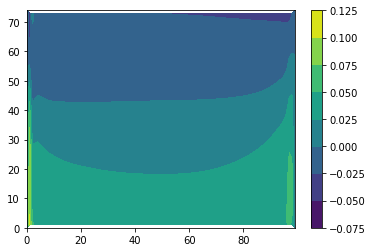

In [265]:
t0[t0==0] = np.nan
plt.contourf(t0[359,1]-t1[359,1])
plt.colorbar()
# t0[t0==0] = np.nan

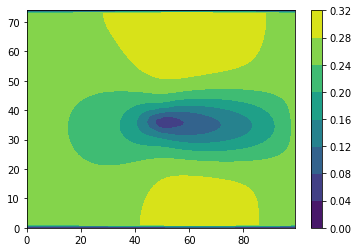

In [254]:
plt.contourf(u1[360,8])
plt.colorbar()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

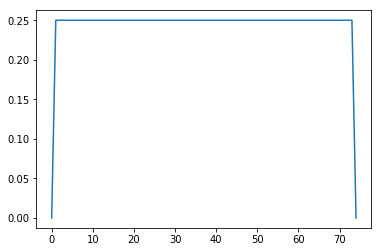

In [278]:
# plt.contourf(u1[75,:,:,0])
plt.plot(u1[75,0,:,0])
plt.colorbar()

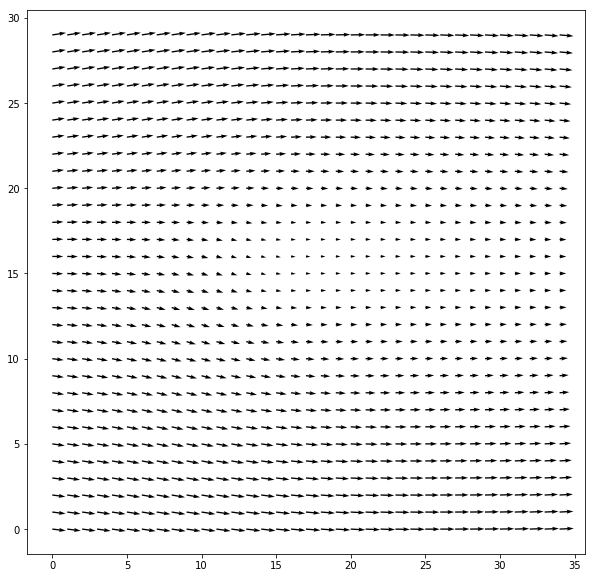

In [255]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.quiver(u1[360,7,20:50,35:70],v1[360,7,20:50,35:70],scale=10)
# plt.quiver(u1[77,8,0:,0:],v1[77,8,0:,0:],scale=10)
# plt.quiver(u1[91,10]-u2[91,10],v1[91,10]-v2[91,10],scale=0.01)

In [132]:
iskp = 3
for i in range(t0.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.pcolormesh( ds001.XC,ds001.YC,t0[i,0], cmap=cm.seismic ,vmin = 25, vmax = 30); plt.colorbar();
#     CS = plt.contour( eta[i,0],levels=np.arange(-0.1,0.1,0.02),colors = 'k', linewidths = 0.5); 
#     ax.clabel(CS, inline=1, fontsize=10)
    plt.quiver(ds001.XC[::iskp], ds001.YC[::iskp],u[i,0,::iskp,::iskp],v[i,0,::iskp,::iskp],scale=10)    
    plt.title('Surface Temp at '+ "%03d"%(i*30+30) + ' step')
    plt.savefig('temp_sur_t02_flat/state_' + "%03d"%i+ '.png', dpi=150, bbox_inches='tight')
    plt.close()
    
try:
    sub.check_call(["convert", "-delay", "20", "-loop", "0", "temp_sur_t02_flat/state_*.png",
                    "temp_sur_t02_flat/anima_eta_00.gif"])
except:
    print("failed to make animation")    

Text(0.5, 1.0, 'Surface Temp at 10830 step')

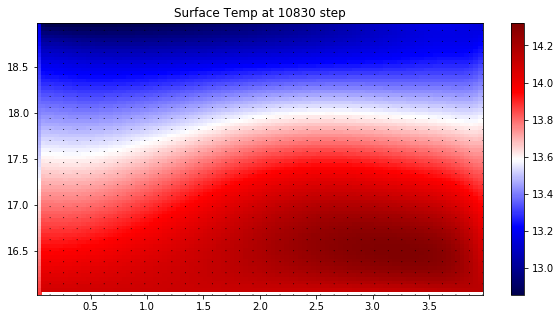

In [145]:
    i=360
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.pcolormesh( ds001.XC,ds001.YC,t0[i,5], cmap=cm.seismic ); plt.colorbar();
#     CS = plt.contour( eta[i,0],levels=np.arange(-0.1,0.1,0.02),colors = 'k', linewidths = 0.5); 
#     ax.clabel(CS, inline=1, fontsize=10)
    plt.quiver(ds001.XC[::iskp], ds001.YC[::iskp],u[i,17,::iskp,::iskp],v[i,17,::iskp,::iskp],scale=1)    
    plt.title('Surface Temp at '+ "%03d"%(i*30+30) + ' step')
 
    

In [39]:
u0 = u.DataArray.mean
u0

dask.array<getitem, shape=(1, 17, 40, 40), dtype=>f4, chunksize=(1, 17, 40, 40)>